In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file_path = '/content/email-Eu-core-temporal-Dept1.txt.gz'
edges = pd.read_csv(file_path, compression='gzip', sep=' ', header=None, names=['source', 'target', 'timestamp'])

In [ ]:
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

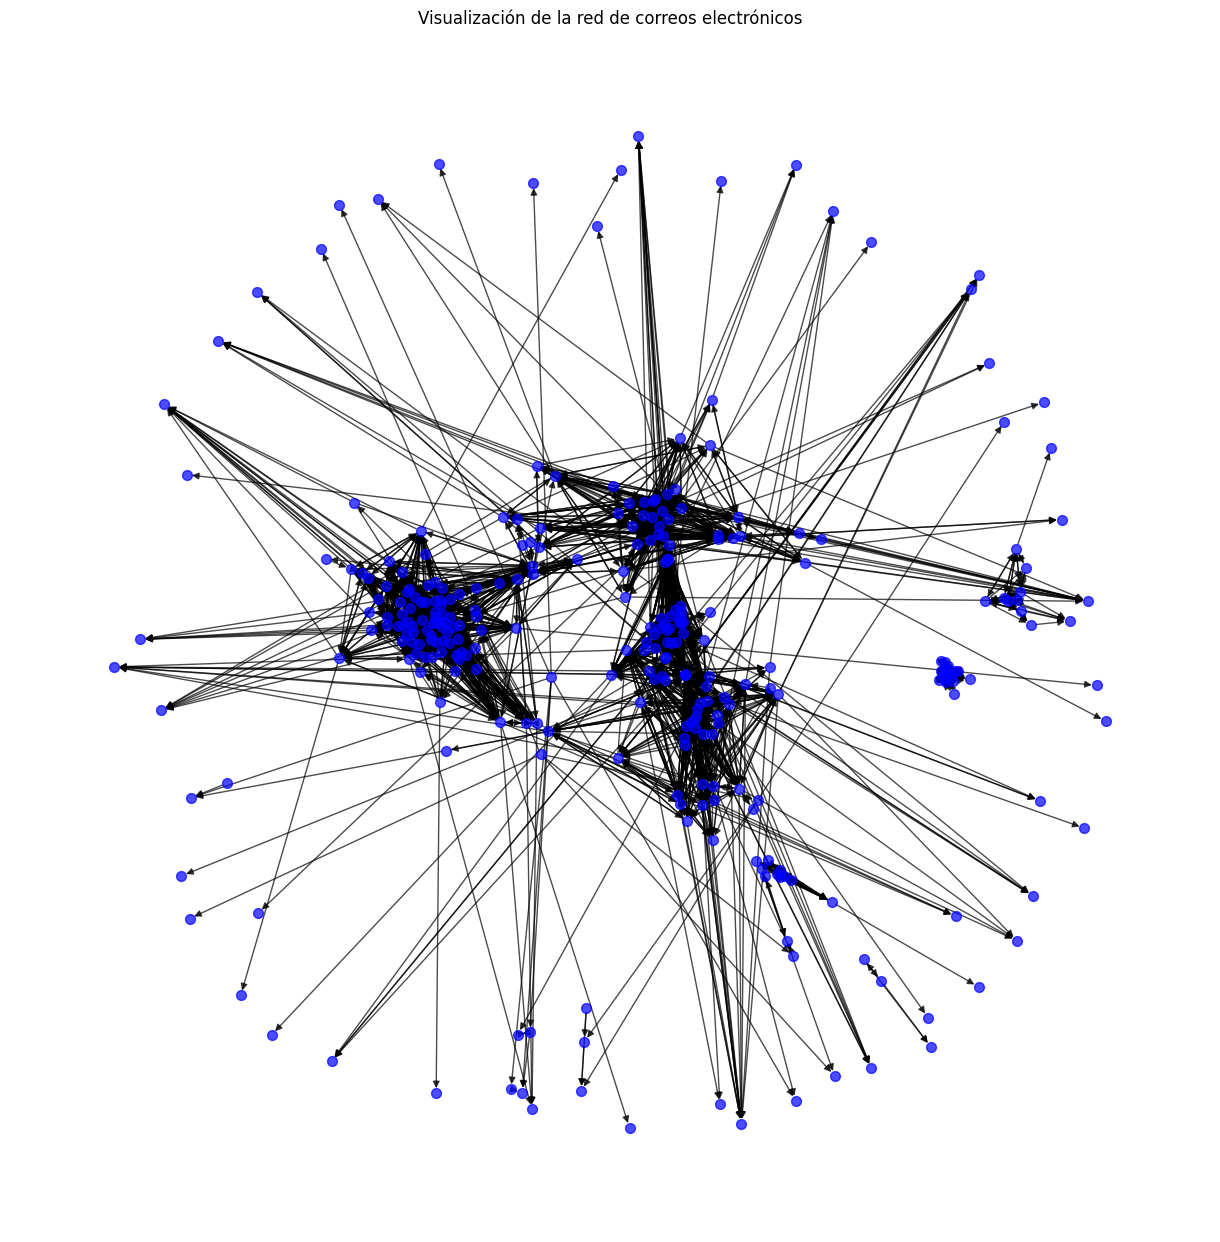

In [ ]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=50, node_color='blue', edge_color='black', alpha=0.7, arrows=True)
plt.title('Visualización de la red de correos electrónicos')
plt.show()

Point B


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Tamaño de la red: {num_nodes} nodos, {num_edges} enlaces")

Tamaño de la red: 309 nodos, 3031 enlaces


In [ ]:
# Average Path Length
if nx.is_strongly_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
else:
    largest_cc = max(nx.strongly_connected_components(G), key=len)
    G_largest_cc = G.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(G_largest_cc)

avg_path_length

2.1897400820793433

In [ ]:
# Clustering Coefficient
clustering_coefficient = nx.average_clustering(G.to_undirected())

# Diameter
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
else:
    diameter = None

print('clustering coefficient:', clustering_coefficient)
print('diameter:', diameter)

clustering coefficient: 0.5727568551431084
diameter: None


Another meassure

In [ ]:
# Average Distance (Only if the graph is connected)
avg_distance = avg_path_length

avg_distance

2.1897400820793433

In [ ]:
# Eccentricity
if nx.is_strongly_connected(G):
    eccentricity = nx.eccentricity(G)
else:
    eccentricity = nx.eccentricity(G_largest_cc)

eccentricity

{7: 3,
 8: 4,
 10: 4,
 13: 4,
 20: 4,
 24: 3,
 25: 3,
 35: 3,
 36: 4,
 37: 5,
 45: 3,
 46: 5,
 47: 3,
 49: 4,
 52: 4,
 57: 3,
 58: 4,
 65: 4,
 83: 3,
 86: 3,
 94: 3,
 101: 3,
 104: 4,
 105: 5,
 108: 3,
 113: 4,
 114: 4,
 116: 4,
 117: 3,
 118: 4,
 122: 3,
 128: 4,
 130: 3,
 131: 4,
 135: 3,
 136: 4,
 139: 4,
 144: 4,
 146: 5,
 149: 4,
 154: 5,
 158: 4,
 162: 4,
 164: 4,
 173: 4,
 178: 4,
 182: 4,
 188: 4,
 189: 3,
 193: 4,
 200: 4,
 202: 4,
 207: 5,
 209: 4,
 210: 5,
 211: 4,
 221: 3,
 228: 3,
 229: 4,
 234: 3,
 236: 4,
 239: 4,
 241: 3,
 242: 4,
 243: 4,
 250: 4,
 252: 3,
 253: 4,
 254: 4,
 260: 5,
 263: 3,
 270: 4,
 271: 4,
 277: 3,
 278: 4,
 279: 3,
 290: 5,
 296: 3,
 299: 3,
 304: 4,
 305: 4,
 308: 4,
 309: 4,
 315: 4,
 316: 4,
 319: 4}

In [ ]:
# Radius
if nx.is_strongly_connected(G):
    radius = nx.radius(G)
else:
    radius = nx.radius(G_largest_cc)

radius

3

Point C. Implementation of Eigenvector centrality

In [ ]:
# Calcular la centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)

# Obtener los nodos con mayor centralidad de intermediación
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness

[(279, 0.015615617568068592),
 (234, 0.008098834930110613),
 (252, 0.007985088547564766),
 (299, 0.005723504539919011),
 (57, 0.00493906170079727),
 (7, 0.00481592790250476),
 (228, 0.004740735185574033),
 (26, 0.00392251272821579),
 (278, 0.0037281323202759645),
 (90, 0.0032407173320805585)]

In [ ]:
# Calcular la centralidad de eigenvector con un número mayor de iteraciones
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Obtener los nodos con mayor centralidad de eigenvector
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector


[(279, 0.27435997687451624),
 (234, 0.2303160079887136),
 (299, 0.22725642433587326),
 (228, 0.22442701307146307),
 (135, 0.20208126938736778),
 (278, 0.19264384184286645),
 (241, 0.19207400529812493),
 (202, 0.1818783243364019),
 (242, 0.1803660496166467),
 (116, 0.17369614704844885)]

Point D. Degree distribution

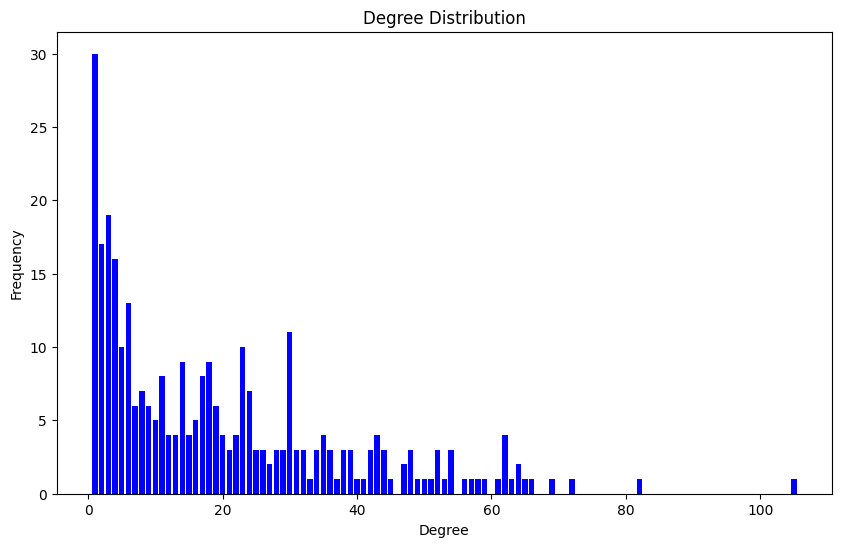

In [ ]:
# Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = pd.Series(degree_sequence).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(degree_count.index, degree_count.values, width=0.80, color='b')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

Point E. Community detection

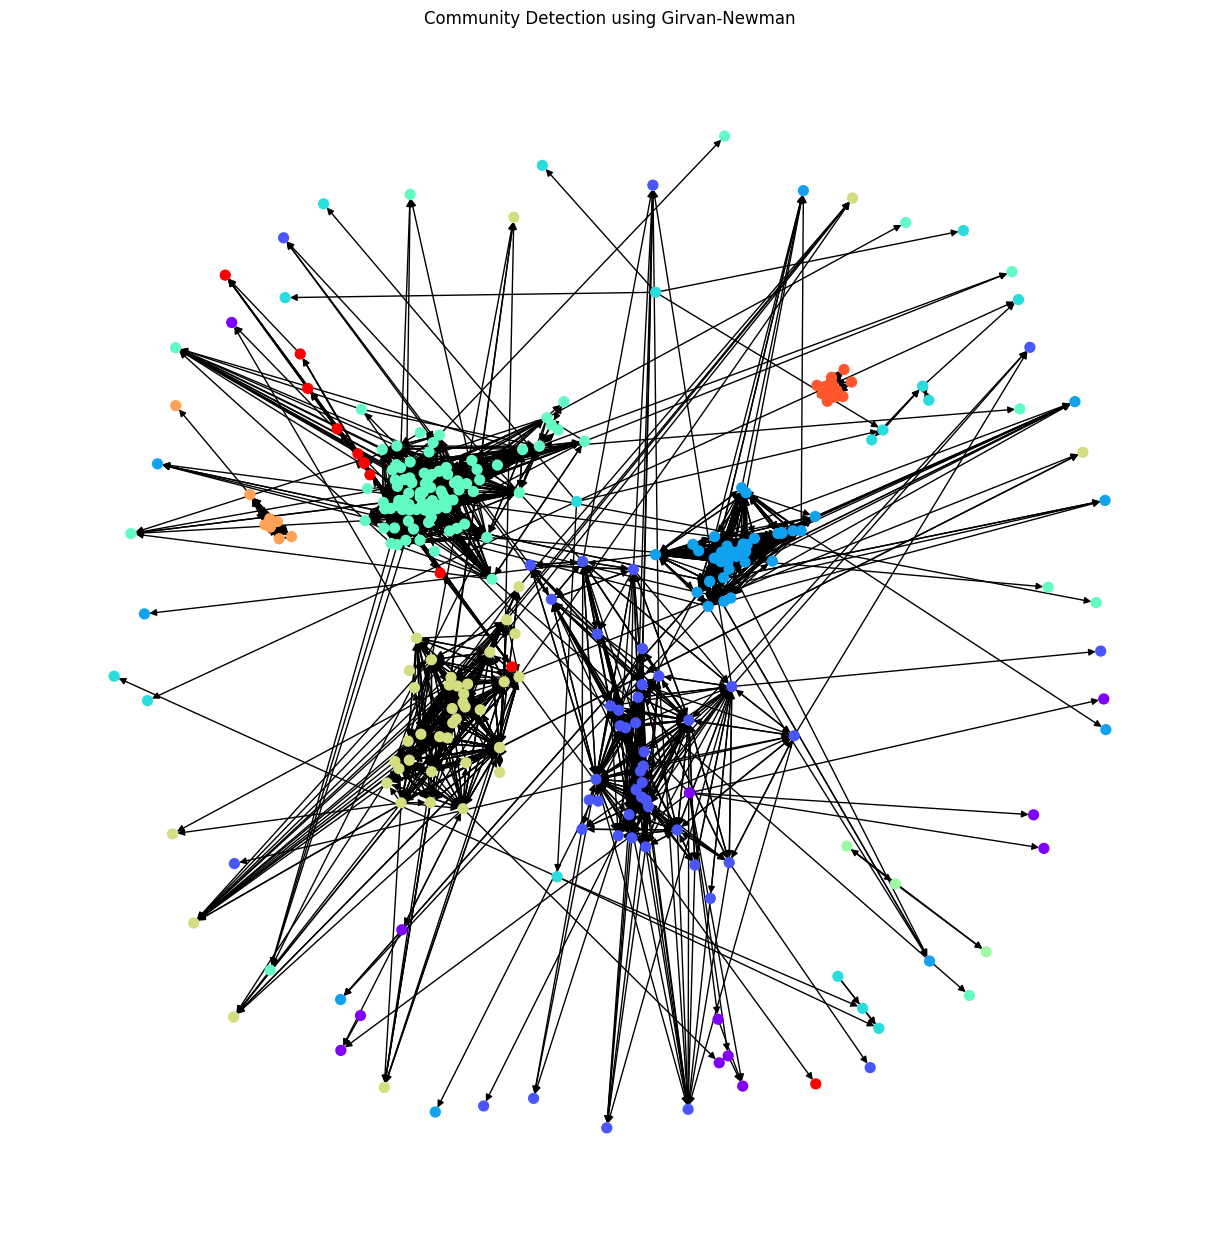

In [ ]:
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman method
communities = girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

# Create a dictionary to map nodes to their community
node_community_map = {}
for i, community in enumerate(sorted_communities):
    for node in community:
        node_community_map[node] = i

# Visualize the communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
colors = [node_community_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.rainbow)
plt.title("Community Detection using Girvan-Newman")
plt.show()